# D7041E Applied artificial intelligence (Lab1, Task 3 Support Vector Machines)
Nazrul Islam & Srinivas Bobba (Group 6)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Task 3.1

We load the iris dataset from sklearn datasets and split it in 80:20 ratio as mentioned in the assignment.

In [ ]:
iris = load_iris()

X = iris.data[:,:4] #features
y = iris.target
feature_names = iris.feature_names[:4]
classes = iris.target_names
print(feature_names)
print(classes)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Here we create three SVM models with linear, polynomial and RBF kernels with multiclassiciaton (one-vs-rest and one-vs-one as mentioned in the assignment). I have found some details from https://scikit-learn.org/stable/modules/svm.html

In [ ]:
# SVM instances, one-vs-rest
linear_ovr = SVC(kernel='linear', decision_function_shape="ovr").fit(X_train, Y_train)
poly_ovr = SVC(kernel='poly', decision_function_shape="ovr").fit(X_train, Y_train)
rbf_ovr = SVC(kernel='rbf', decision_function_shape="ovr").fit(X_train, Y_train)

#SVM instances, one-vs-one
linear_ovo = SVC(kernel='linear', decision_function_shape="ovo").fit(X_train, Y_train)
poly_ovo = SVC(kernel='poly', decision_function_shape="ovo").fit(X_train, Y_train)
rbf_ovo = SVC(kernel='rbf', decision_function_shape="ovo").fit(X_train, Y_train)

*(Point 1)* Here we find the accuracy and f1 score for each of the SVM model

In [ ]:
kernel_texts = ['linear kernel (OVR)', 'polynomial kernel (OVR)', 'RBF kernel (OVR)', 'linear kernel(OVO)', 'polynomial kernel (OVO)', 'RBF kernel (OVO)']

for i, clf in enumerate((linear_ovr, poly_ovr, rbf_ovr, linear_ovo, poly_ovo, rbf_ovo)):
  pred = clf.predict(X_test)
  f1 = f1_score(Y_test, pred, average='weighted')
  accuracy = accuracy_score(Y_test, pred)
  print(kernel_texts[i],"has accuracy: ", accuracy, ", F1 score : ", f1)

  #matrix = confusion_matrix(pred, Y_test)
  #print(matrix)#.confusion_matrix)

linear kernel (OVR) has accuracy:  0.9666666666666667 , F1 score :  0.9661728395061729
polynomial kernel (OVR) has accuracy:  0.9666666666666667 , F1 score :  0.9661728395061729
RBF kernel (OVR) has accuracy:  0.9333333333333333 , F1 score :  0.9342592592592592
linear kernel(OVO) has accuracy:  0.9666666666666667 , F1 score :  0.9661728395061729
polynomial kernel (OVO) has accuracy:  0.9666666666666667 , F1 score :  0.9661728395061729
RBF kernel (OVO) has accuracy:  0.9333333333333333 , F1 score :  0.9342592592592592


*(Point 2)* The accuracy and f1 is same for more than 1 kernel. Here, linear and polynomial kernets has better accuracy and f1 score.

*(Point 3)* Extracting the support vectors for each class in one-vs-rest, we have chosen the linear one. As per docs in https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC support_vectors_ attribute provides support vectors

In [ ]:
clf = linear_ovr
support_vectors = clf.support_vectors_

Plotting the the decision boundary for features 2 vs. 3

got help from https://stackoverflow.com/questions/60981205/how-to-find-the-support-vectors-for-svm

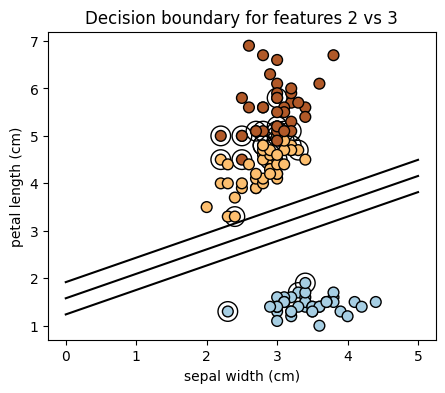

In [ ]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[1] / w[2]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[2]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(5, 4))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.title("Decision boundary for features 2 vs 3")
plt.show()

Plotting decision boundary for features 3 vs. 4

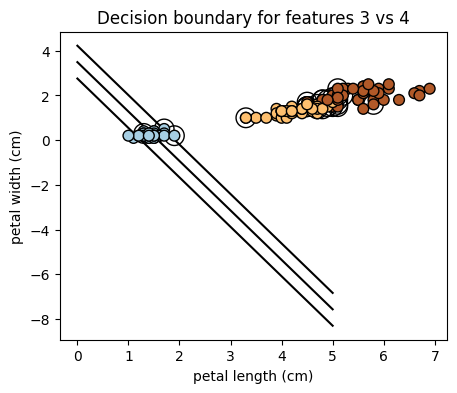

In [ ]:
#3vs4 decision boundry

#get the separating hyperplane
a = -w[2] / w[3]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[3]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(5, 4))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 2], clf.support_vectors_[:, 3], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Decision boundary for features 3 vs 4")
plt.show()